# Example:  PDB ID 6ox2
## In this example, we demonstrate how to use ResidueX to substitute the 8th residue in a generated peptide scaffold—originally a natural histidine—with a non-canonical amino acid, specifically 4-methyl-histidine.

In [14]:
import glob
import os
import pandas as pd
from ResidueX.residuex import *
from ResidueX.generate_conformer import *
from ResidueX.utils import *



# Notes
## 1. pathE: Working directory containing data and outputs for non-canonical amino acid (ncAA) peptide generation.

## 2. case name: Identifier for a specific peptide-ncAA case within pathE.

## 3. NCAA_sml: SMILES of the ncAA, capped with methyl groups at both N- and C-termini.

## 4. NCAA_name: Custom name assigned to the ncAA, used for naming output directories.

## 5. chosen_peptide: PDB file of the selected natural peptide scaffold, located in pathE/case_name/.

## 6. residue_id: Index of the residue in the peptide to be replaced with the ncAA.

In [3]:
pathE = './example/'
df_all_work = pd.DataFrame()
list_fail = []

csv_data = []


case_name='6ox2_Z'


pdb_case_path = f"{pathE}/{case_name}"


df_each_pdb_case = pair_files_in_directory(pdb_case_path)
df_all_work = pd.concat([df_all_work, df_each_pdb_case], ignore_index=True)

NCAA_sml = 'CN[C@@H](CC1=CN(C)C=N1)C(=O)C'
NCAA_name = 'PDB_NCAA'

residue_id = 8
work_path = pdb_case_path


chosen_peptide = 'ranked_100_sp_pep.pdb'
input_pdb_path = f"{work_path}/{chosen_peptide}"
residue_to_extract = residue_id
output_tag = chosen_peptide.split('.')[0]
output_pdb_path = f"{work_path}/{output_tag}"
os.makedirs(output_pdb_path, exist_ok=True)


# Visualize provided non-canonical amino acid
## 4-METHYL-HISTIDINE is used in this case.

In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

# Define the NCAA SMILES string
NCAA_sml = 'CN[C@@H](CC1=CN(C)C=N1)C(=O)C'
mol = Chem.MolFromSmiles(NCAA_sml)
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.UFFOptimizeMolecule(mol)

# Convert to MolBlock for py3Dmol
mol_block = Chem.MolToMolBlock(mol)

# Visualize NCAA molecule
view1 = py3Dmol.view(width=600, height=400)
view1.addModel(mol_block, 'mol')
view1.setStyle({'stick': {}})
view1.setBackgroundColor('white')
view1.zoomTo()
view1.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

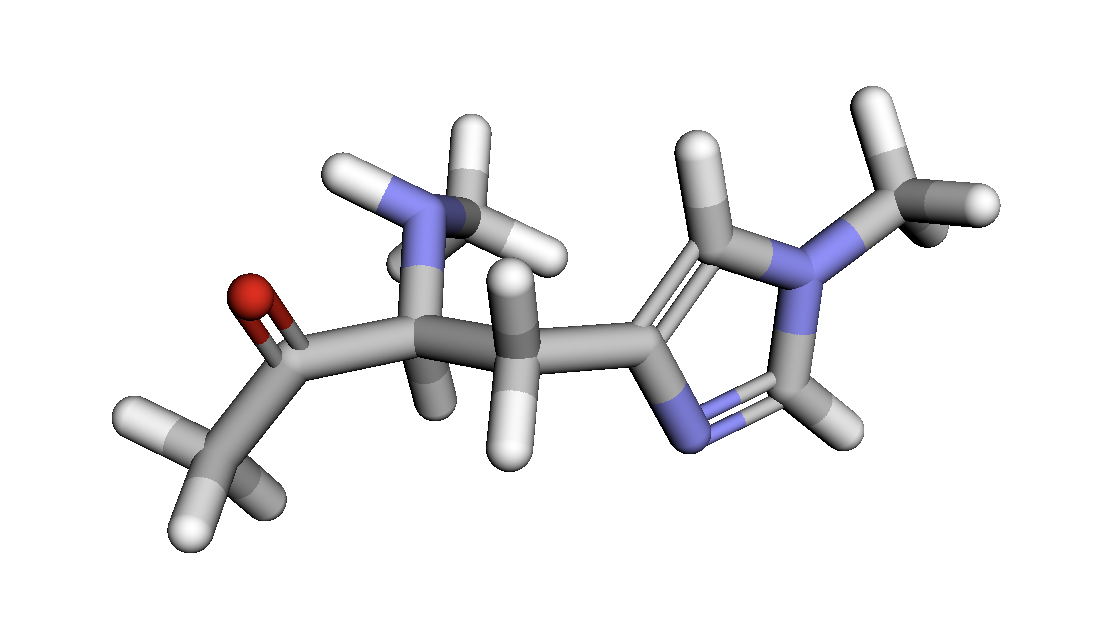

In [23]:
from IPython.display import Image
Image(filename='example/ncAA.png')


# Visualize the selected peptide scaffold (natural amino acid). 
## The chosen residue is colored in red. The 8-th residue is chosen in this case.

In [11]:
import os
import py3Dmol

# Set peptide path
work_path = pdb_case_path
chosen_peptide = 'ranked_100_sp_pep.pdb'
input_pdb_path = f"{work_path}/{chosen_peptide}"
residue_id = 8  # The residue you want to highlight

# Read and display the peptide PDB file
with open(input_pdb_path, 'r') as f:
    pdb_block = f.read()

# Visualize peptide with cartoon + atoms + highlighted residue
view = py3Dmol.view(width=800, height=500)
view.addModel(pdb_block, 'pdb')

# Set default cartoon style for the entire peptide
view.setStyle({'cartoon': {'color': 'spectrum'}})

# Add stick (atom-level) representation to entire peptide
view.addStyle({'stick': {}})

# Highlight residue_id = 8 with red sticks
view.addStyle({'resi': str(residue_id)}, {'stick': {'colorscheme': 'redCarbon'}})

view.setBackgroundColor('white')
view.zoomTo()
view.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

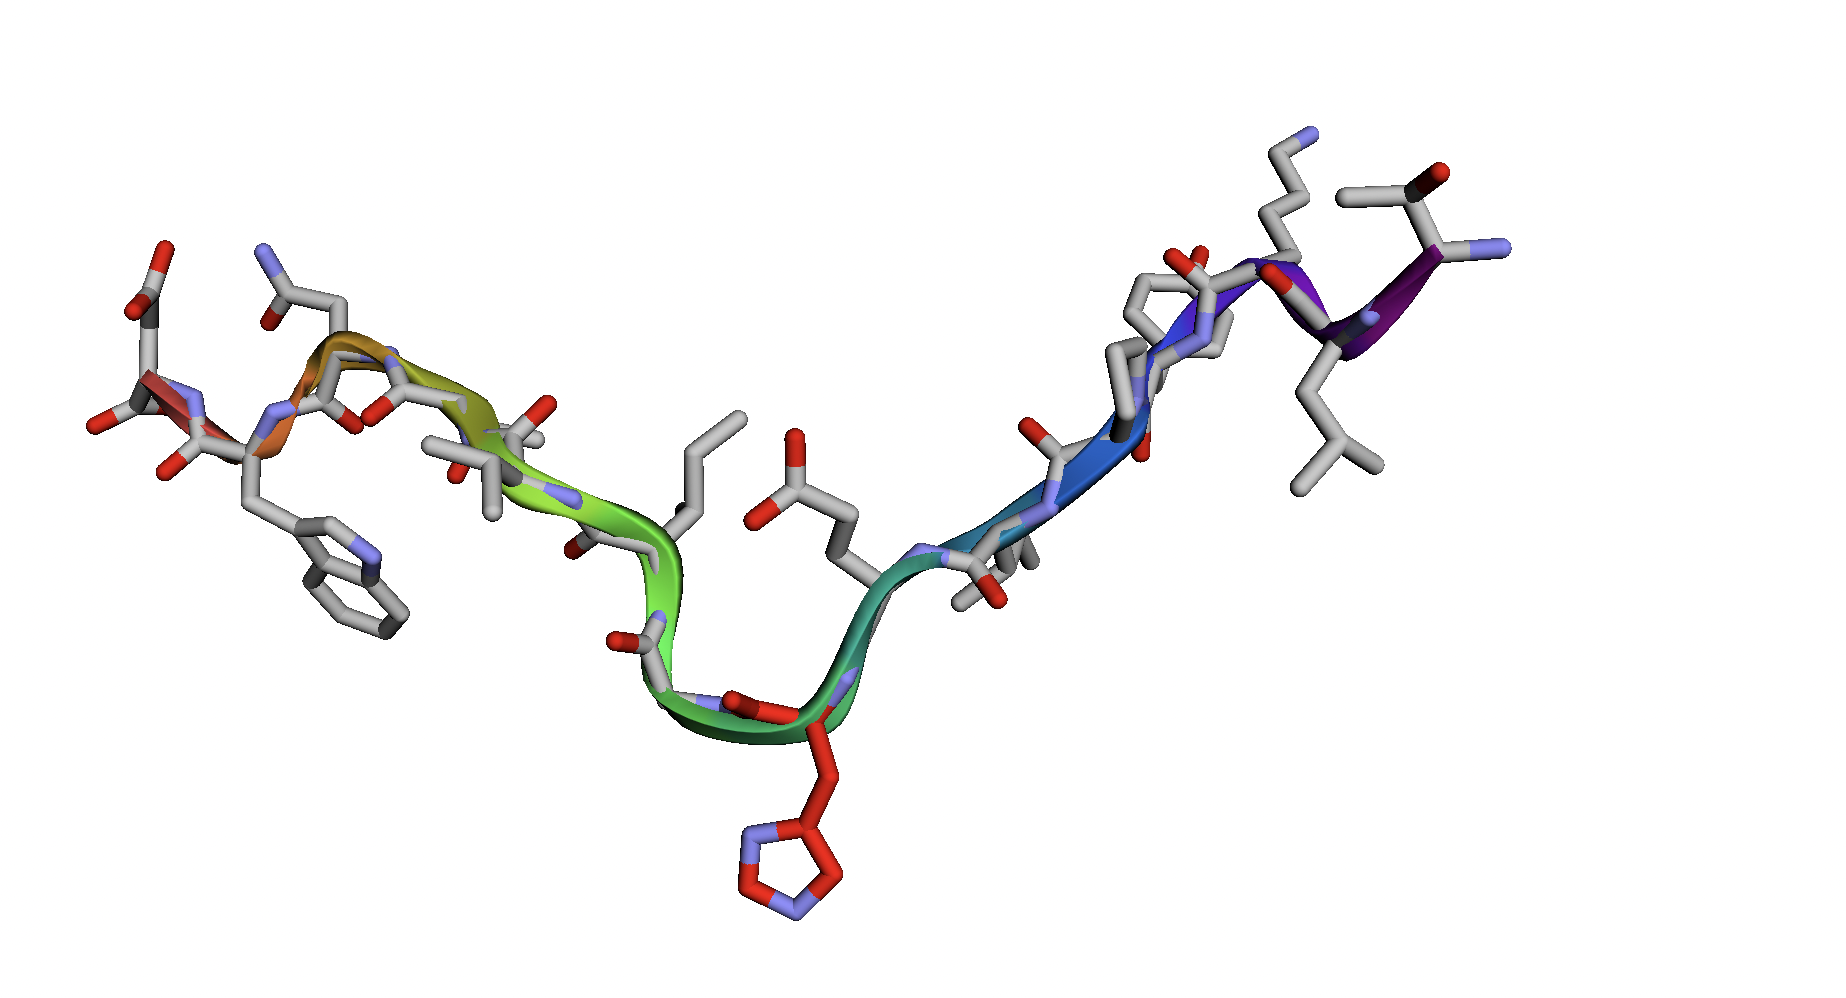

In [24]:
from IPython.display import Image
Image(filename='example/natural_peptide.png')


## ResidueX: generate ncAA peptide conformers

In [9]:

output_residue_path = f"{output_pdb_path}/residue.pdb"
output_rest_path = f"{output_pdb_path}/rest.pdb"
split_pdb_by_residue(input_pdb_path, residue_to_extract, output_residue_path, output_rest_path)

ncaa_SDF_saved_path = f"{output_pdb_path}/NCAA_conf_SDF_{NCAA_name}"
os.makedirs(ncaa_SDF_saved_path, exist_ok=True)
NCAA_sdf_generation(NCAA_sml, output_residue_path, ncaa_SDF_saved_path)

sdf_files_list = glob.glob(os.path.join(ncaa_SDF_saved_path, '*.sdf'))
for each_ncaa_SDF_path in sdf_files_list:
    input_pep_pdb_path = f"{work_path}/{chosen_peptide}"
    chosen_peptide_ready = f"{chosen_peptide}_ready"
    output_pep_pdb_path = f"{work_path}/{chosen_peptide_ready}"

    each_ncaa_SDF_name = os.path.basename(each_ncaa_SDF_path).split('.')[0]
    output_NCAA_pep_path = f"{work_path}/{output_tag}/output_NCAA_peptides_{NCAA_name}"
    os.makedirs(output_NCAA_pep_path, exist_ok=True)

    NCAA_peptide_SDF_path = f"{output_NCAA_pep_path}/ncaa_res{residue_id}_{each_ncaa_SDF_name}.sdf"
    NCAA_peptide_PDB_path = f"{output_NCAA_pep_path}/ncaa_res{residue_id}_{each_ncaa_SDF_name}.pdb"
    distance_info_txt_path = f"{output_NCAA_pep_path}/min_distance_ncaa_res{residue_id}_{each_ncaa_SDF_name}.txt"

    min_distance = integrate_NCAA_into_peptide(each_ncaa_SDF_path, residue_id, input_pep_pdb_path, output_pep_pdb_path, NCAA_peptide_SDF_path, distance_info_txt_path)

    os.system(f'obabel -isdf {NCAA_peptide_SDF_path} -O {NCAA_peptide_PDB_path}')




[3, 4, 5, 6, 7, 8, 9]
{1: <rdkit.Geometry.rdGeometry.Point3D object at 0x1734af640>, 2: <rdkit.Geometry.rdGeometry.Point3D object at 0x1734af6c0>, 10: <rdkit.Geometry.rdGeometry.Point3D object at 0x1734af7c0>, 11: <rdkit.Geometry.rdGeometry.Point3D object at 0x1734af740>} [(1, 0), (2, 1), (10, 2), (11, 3)] [1, 2, 10, 11]
13 conformers generated in initial step
Min RMSD between mol's core and reference core: 0.00
Get 13 conformers with core RMSD < 1.0.
Finally, 13 conformers generated after sidechain clustering.
[H]C1=NC(C([H])([H])[C@@]([H])(C(=O)C([H])([H])[H])N([H])C([H])([H])[H])=C([H])N1C([H])([H])[H]
./example//6ox2_Z/ranked_100_sp_pep.pdb ./example//6ox2_Z/ranked_100_sp_pep.pdb_ready 8 ['N', 'H', 'CA', 'C', 'O']
pep_carbon_alpha_to_link,pep_carbon_CO_to_link, pep_carbon_N_to_link,pep_ready_specific_residue_list, pep_ready_specific_residue_hydrogen_indices 128 129 126 [126, 128, 129, 130] [127]
atom_side_chain_list,atom_to_delete_list,atom_side_chain_to_connect,atom_connected_hydr

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


[H]C1=NC(C([H])([H])[C@@]([H])(C(=O)C([H])([H])[H])N([H])C([H])([H])[H])=C([H])N1C([H])([H])[H]
./example//6ox2_Z/ranked_100_sp_pep.pdb ./example//6ox2_Z/ranked_100_sp_pep.pdb_ready 8 ['N', 'H', 'CA', 'C', 'O']
pep_carbon_alpha_to_link,pep_carbon_CO_to_link, pep_carbon_N_to_link,pep_ready_specific_residue_list, pep_ready_specific_residue_hydrogen_indices 128 129 126 [126, 128, 129, 130] [127]
atom_side_chain_list,atom_to_delete_list,atom_side_chain_to_connect,atom_connected_hydrogens_to_alpha_C [2, 3, 4, 5, 6, 7, 8, 9, 17, 18, 19, 20, 21, 22, 23, 24] [0, 1, 10, 11, 12, 13, 14, 15, 16, 25, 26, 27] 2 [17]
Mapping for pepbb: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 4

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


[H]C1=NC(C([H])([H])[C@@]([H])(C(=O)C([H])([H])[H])N([H])C([H])([H])[H])=C([H])N1C([H])([H])[H]
./example//6ox2_Z/ranked_100_sp_pep.pdb ./example//6ox2_Z/ranked_100_sp_pep.pdb_ready 8 ['N', 'H', 'CA', 'C', 'O']
pep_carbon_alpha_to_link,pep_carbon_CO_to_link, pep_carbon_N_to_link,pep_ready_specific_residue_list, pep_ready_specific_residue_hydrogen_indices 128 129 126 [126, 128, 129, 130] [127]
atom_side_chain_list,atom_to_delete_list,atom_side_chain_to_connect,atom_connected_hydrogens_to_alpha_C [2, 3, 4, 5, 6, 7, 8, 9, 17, 18, 19, 20, 21, 22, 23, 24] [0, 1, 10, 11, 12, 13, 14, 15, 16, 25, 26, 27] 2 [17]
Mapping for pepbb: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 4

[H]C1=NC(C([H])([H])[C@@]([H])(C(=O)C([H])([H])[H])N([H])C([H])([H])[H])=C([H])N1C([H])([H])[H]
./example//6ox2_Z/ranked_100_sp_pep.pdb ./example//6ox2_Z/ranked_100_sp_pep.pdb_ready 8 ['N', 'H', 'CA', 'C', 'O']
pep_carbon_alpha_to_link,pep_carbon_CO_to_link, pep_carbon_N_to_link,pep_ready_specific_residue_list, pep_ready_specific_residue_hydrogen_indices 128 129 126 [126, 128, 129, 130] [127]
atom_side_chain_list,atom_to_delete_list,atom_side_chain_to_connect,atom_connected_hydrogens_to_alpha_C [2, 3, 4, 5, 6, 7, 8, 9, 17, 18, 19, 20, 21, 22, 23, 24] [0, 1, 10, 11, 12, 13, 14, 15, 16, 25, 26, 27] 2 [17]
Mapping for pepbb: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 4

1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


# Visualize one of the generated ncAA peptide. 
## The chosen residue is colored in red. The 8-th residue is chosen in this case.

In [21]:
import glob
import py3Dmol
import os

# Get the path to the NCAA-integrated peptide PDB files
output_NCAA_pep_path = f"{work_path}/{output_tag}/output_NCAA_peptides_{NCAA_name}"
pdb_files = glob.glob(os.path.join(output_NCAA_pep_path, '*.pdb'))



# Check and visualize the first one
if pdb_files:
    pdb_to_visualize = pdb_files[0]
    with open(pdb_to_visualize, 'r') as f:
        pdb_block = f.read()

    print(f"Visualizing: {os.path.basename(pdb_to_visualize)}")

    view = py3Dmol.view(width=800, height=500)
    view.addModel(pdb_block, 'pdb')

    # Default cartoon + stick for whole structure
    view.setStyle({'cartoon': {'color': 'spectrum'}})
    view.addStyle({'stick': {}})

    # Highlight specified residue in red stick style
    view.addStyle({'resi': str(residue_id)}, {'stick': {'colorscheme': 'redCarbon'}})

    view.setBackgroundColor('white')
    view.zoomTo()
    view.show()
else:
    print("No PDB files found for NCAA-integrated peptides.")



Visualizing: ncaa_res8_09.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

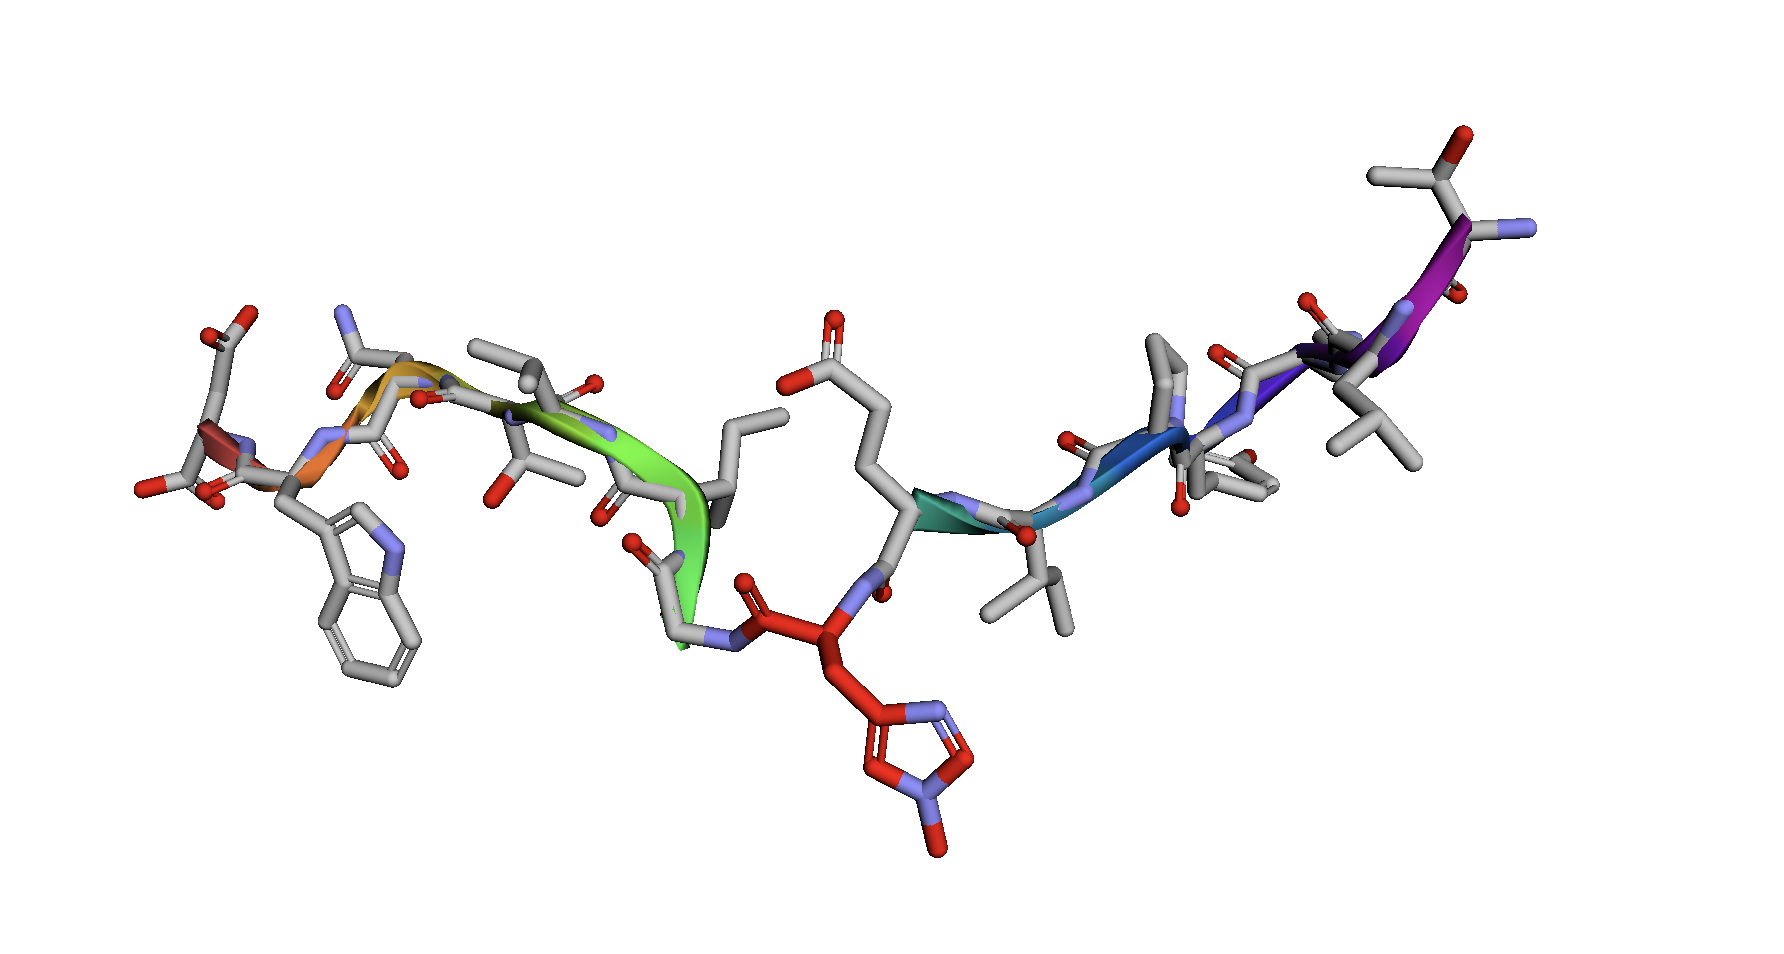

In [25]:
from IPython.display import Image
Image(filename='example/ncAA_peptide.png')
